# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adding column names
col_names = ['HCHO readings', 'Location', 'Current date', 'Next Date']

In [4]:
# Importing datasets
dataset1 = pd.read_csv('./dataset/col_mat_nuw_output.csv', names = col_names)
dataset2 = pd.read_csv('./dataset/kan_output.csv', names = col_names)
dataset3 = pd.read_csv('./dataset/mon_kur_jaf_output.csv', names = col_names)

In [5]:
dataset1.head()

,HCHO readings,Location,Current date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


In [6]:
dataset2.head()

,HCHO readings,Location,Current date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06


In [7]:
dataset3.head()

,HCHO readings,Location,Current date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06


In [8]:
# Merging the 3 datasets into one
merged_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index = True)
merged_dataset.to_csv('merged_dataset.csv', index = False)

In [9]:
# Importing merged dataset
df = pd.read_csv("./merged_dataset.csv")
df

,HCHO readings,Location,Current date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12777,NaN,Jaffna Proper,2023-12-27,2023-12-28
12778,0.000051,Jaffna Proper,2023-12-28,2023-12-29
12779,0.000127,Jaffna Proper,2023-12-29,2023-12-30
12780,0.000117,Jaffna Proper,2023-12-30,2023-12-31


# Data Preprocessing

In [10]:
# Check for missing values
print("Missing values in the dataset")
print(df.isnull().sum())

Missing values in the dataset
HCHO readings    4864
Location            0
Current date        0
Next Date           0
dtype: int64


In [11]:
mean = df.groupby('Location')['HCHO readings'].transform('mean')
df['HCHO readings'].fillna(mean, inplace=True)
df.isnull().sum()

HCHO readings    0
Location         0
Current date     0
Next Date        0
dtype: int64

In [12]:
# Check for duplicates
print("Number of duplicates : ", df.duplicated().sum())

Number of duplicates :  0


In [13]:
# Checking for outliers
print("Number of negative values : ",(df['HCHO readings'] < 0).sum())
# convert negative values to NaN values
df.loc[df['HCHO readings'] < 0, 'HCHO readings'] = pd.NA
df.isnull().sum()

Number of negative values :  563


HCHO readings    563
Location           0
Current date       0
Next Date          0
dtype: int64

In [14]:
# fill missing values
city_mean = df.groupby('Location')['HCHO readings'].transform('mean')
df['HCHO readings'].fillna(city_mean, inplace=True)
df.isnull().sum()

HCHO readings    0
Location         0
Current date     0
Next Date        0
dtype: int64

In [15]:
# Saving final dataset
df.to_csv('final_dataset.csv',index = False)

# Exploring Statistics

### Mean, Median and Standard Deviation of each city

In [16]:
# Iterate through each region in the Location column
for location in df['Location'].unique():
    # Filter the dataframe for the current location
    filtered_df = df[df['Location'] == location]
    # Calculate mean for HCHO readings
    mean_value = filtered_df['HCHO readings'].mean()
    # Calculate median for HCHO readings
    median_value = filtered_df['HCHO readings'].median()
    # Calculate standard deviation for HCHO readings
    std_value = filtered_df['HCHO readings'].std()
    
    # Display results
    print("Region: '{}'".format(location))
    print("Mean: {}".format(mean_value))
    print("Median: {}".format(median_value))
    print("Standard Deviation: {}".format(std_value))
    print()

Region: 'Colombo Proper'
Mean: 0.000164529161874494
Median: 0.00015857140421356622
Standard Deviation: 7.712121410591354e-05

Region: 'Deniyaya, Matara'
Mean: 0.00010080196390294515
Median: 9.16560803424453e-05
Standard Deviation: 6.048576882429863e-05

Region: 'Nuwara Eliya Proper'
Mean: 9.497559860401533e-05
Median: 8.792586073765202e-05
Standard Deviation: 4.327292868811193e-05

Region: 'Kandy Proper'
Mean: 0.00011617480340714707
Median: 0.0001063760956208587
Standard Deviation: 5.57143585920947e-05

Region: 'Bibile, Monaragala'
Mean: 0.00013478774115911909
Median: 0.00012643137974117414
Standard Deviation: 6.151338804298955e-05

Region: 'Kurunegala Proper'
Mean: 0.00013974523035848162
Median: 0.00013402027026665427
Standard Deviation: 6.318936553246546e-05

Region: 'Jaffna Proper'
Mean: 0.000114060776082071
Median: 0.00010880866503687948
Standard Deviation: 6.269673678659624e-05



### Mean, Median and Standard Deviation of the whole dataset

In [17]:
mean_value = df['HCHO readings'].mean()
median_value = df['HCHO readings'].median()
std_value = df['HCHO readings'].std()

print("Mean of the whole dataset : ", mean_value)
print("Median of the whole dataset : ", median_value)
print("Standard Deviation of the whole dataset : ", std_value)

Mean of the whole dataset :  0.00012358218219832477
Median of the whole dataset :  0.00010880866503687948
Standard Deviation of the whole dataset :  6.527384110125208e-05


### Distribution of HCHO

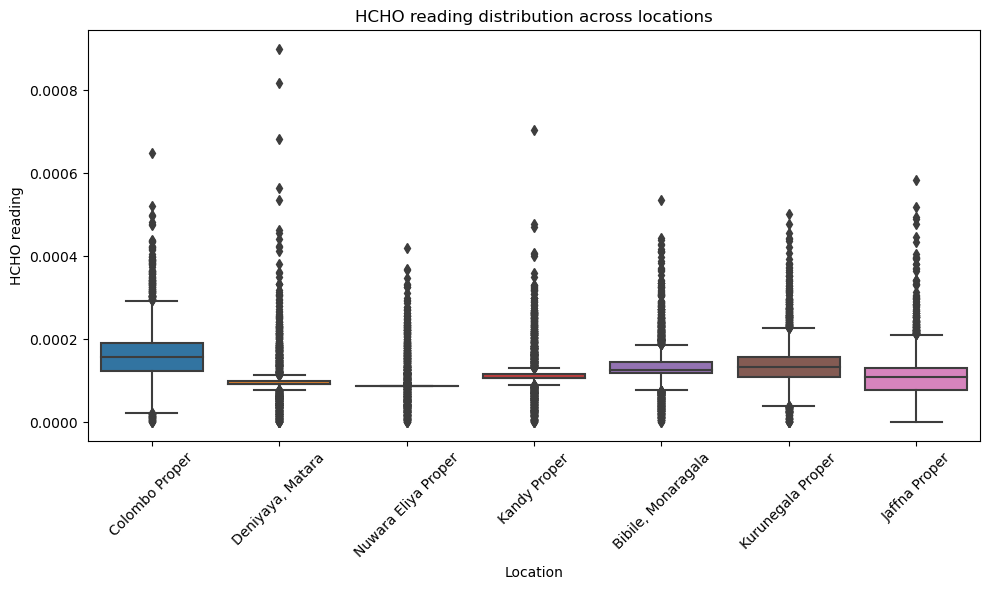

In [18]:
hcho_reading = df['HCHO readings']
location = df['Location']

plt.figure(figsize = (10,6))
sns.boxplot(x = location, y = hcho_reading)
plt.title('HCHO reading distribution across locations')
plt.xlabel('Location')
plt.ylabel('HCHO reading')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

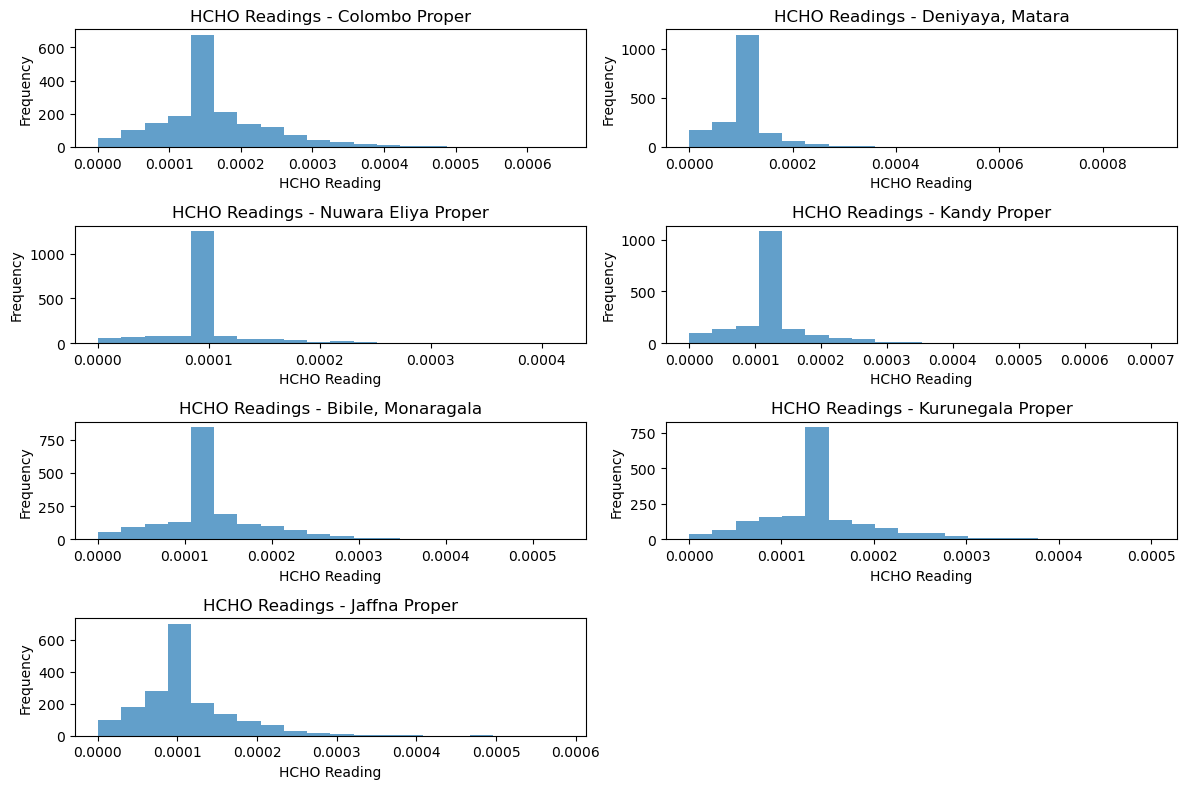

In [19]:
# Get each location
locations = df['Location'].unique()

# Set up subplots
no_of_locations = len(locations)
no_of_cols = 2
no_of_rows = (no_of_locations + no_of_cols - 1) // no_of_cols

fig, axes = plt.subplots(no_of_rows, no_of_cols, figsize = (12,8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each location
for i, location in enumerate(locations):
    # Filter data for current location
    location_data = df[df['Location']== location]['HCHO readings']
    # Plot histogram
    axes[i].hist(location_data, bins = 20, alpha = 0.7)
    axes[i].set_title(f'HCHO Readings - {location}')
    axes[i].set_xlabel('HCHO Reading')
    axes[i].set_ylabel('Frequency')

# Hide unused subplots
for j in range(no_of_locations, no_of_cols * no_of_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Spatio Temporal Analysis

### Average HCHO readings for each month

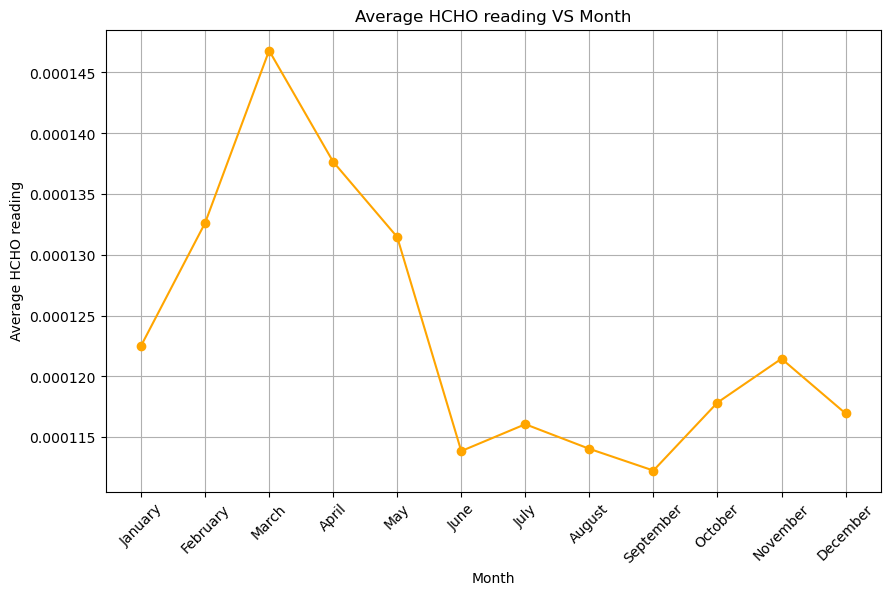

In [20]:
# Convert Current date into datetime format
df['Current date'] = pd.to_datetime(df['Current date'])
# Extract month from Current date
df['Month'] = df['Current date'].dt.month_name()
# Calculate average HCHO readings for each month
avg_hcho_month = df.groupby('Month')['HCHO readings'].mean()

# Sort months accordingly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_hcho_month = avg_hcho_month.reindex(months_order)

# Plot diagram
plt.figure(figsize=(10,6))
plt.plot(avg_hcho_month.index, avg_hcho_month.values, marker = 'o', linestyle = '-', color = 'orange')
plt.title("Average HCHO reading VS Month")
plt.xlabel('Month')
plt.ylabel('Average HCHO reading')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

### Average HCHO readings for each year

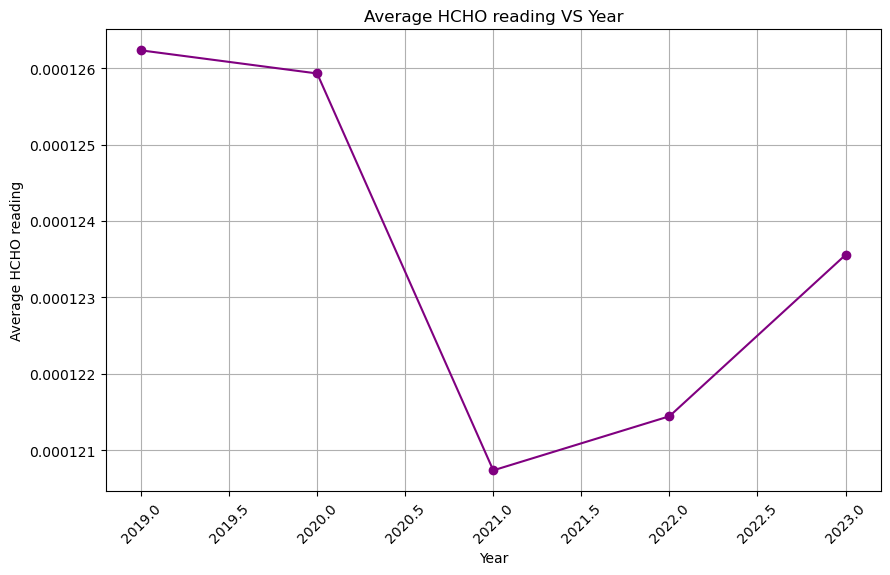

In [21]:
# Convert Current date into datetime format
df['Current date'] = pd.to_datetime(df['Current date'])
# Extract year from Current date
df['Year'] = df['Current date'].dt.year
# Calculate average HCHO readings for each year
avg_hcho_year = df.groupby('Year')['HCHO readings'].mean()


# Plot diagram
plt.figure(figsize=(10,6))
plt.plot(avg_hcho_year.index, avg_hcho_year.values, marker = 'o', linestyle = '-', color = 'purple')
plt.title("Average HCHO reading VS Year")
plt.xlabel('Year')
plt.ylabel('Average HCHO reading')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

### Yearly comparison of HCHO readings by Location

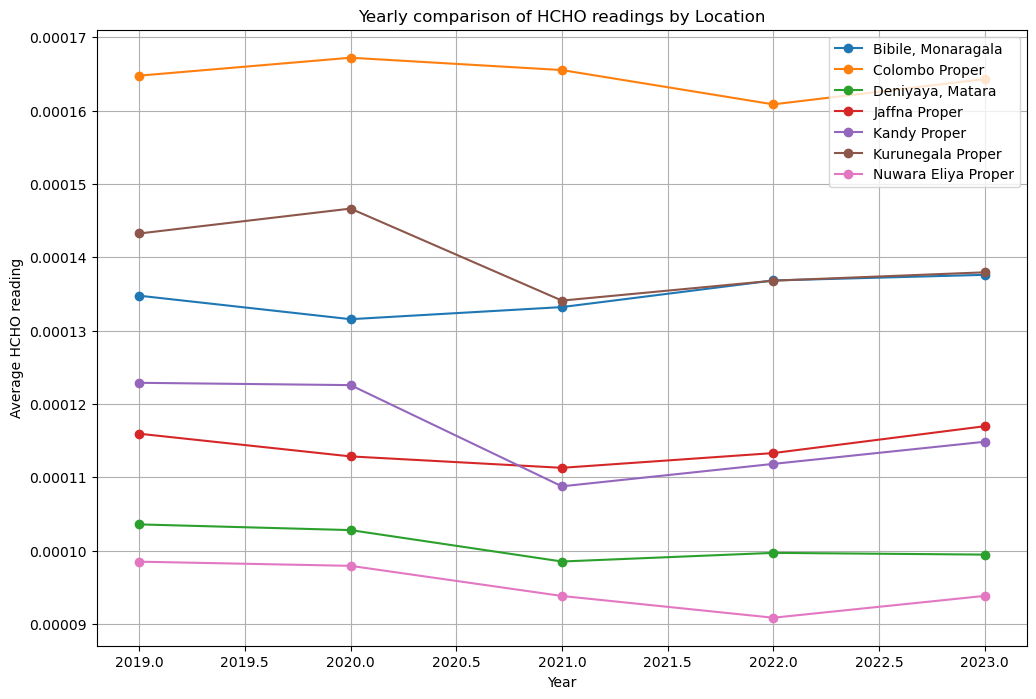

In [22]:
# Convert Current date into datetime format
df['Current date'] = pd.to_datetime(df['Current date'])
# Extract year from Current date
df['Year'] = df['Current date'].dt.year

plt.figure(figsize = (12,8))

# Group data by Location and Year and calucalate average HCHO readings
grouped = df.groupby(['Location', 'Year'])['HCHO readings'].mean().reset_index()

# Loop through each iteration and plot HCHO readings
for location in grouped['Location'].unique():
    location_data = grouped[grouped['Location'] == location]
    plt.plot(location_data['Year'], location_data['HCHO readings'], marker = 'o', label = location)
    
    plt.title("Yearly comparison of HCHO readings by Location")
    plt.xlabel('Year')
    plt.ylabel('Average HCHO reading')
    plt.legend(loc = 'upper right')
    plt.grid(True)
    

### HCHO Levels Before, After and During Lockdown

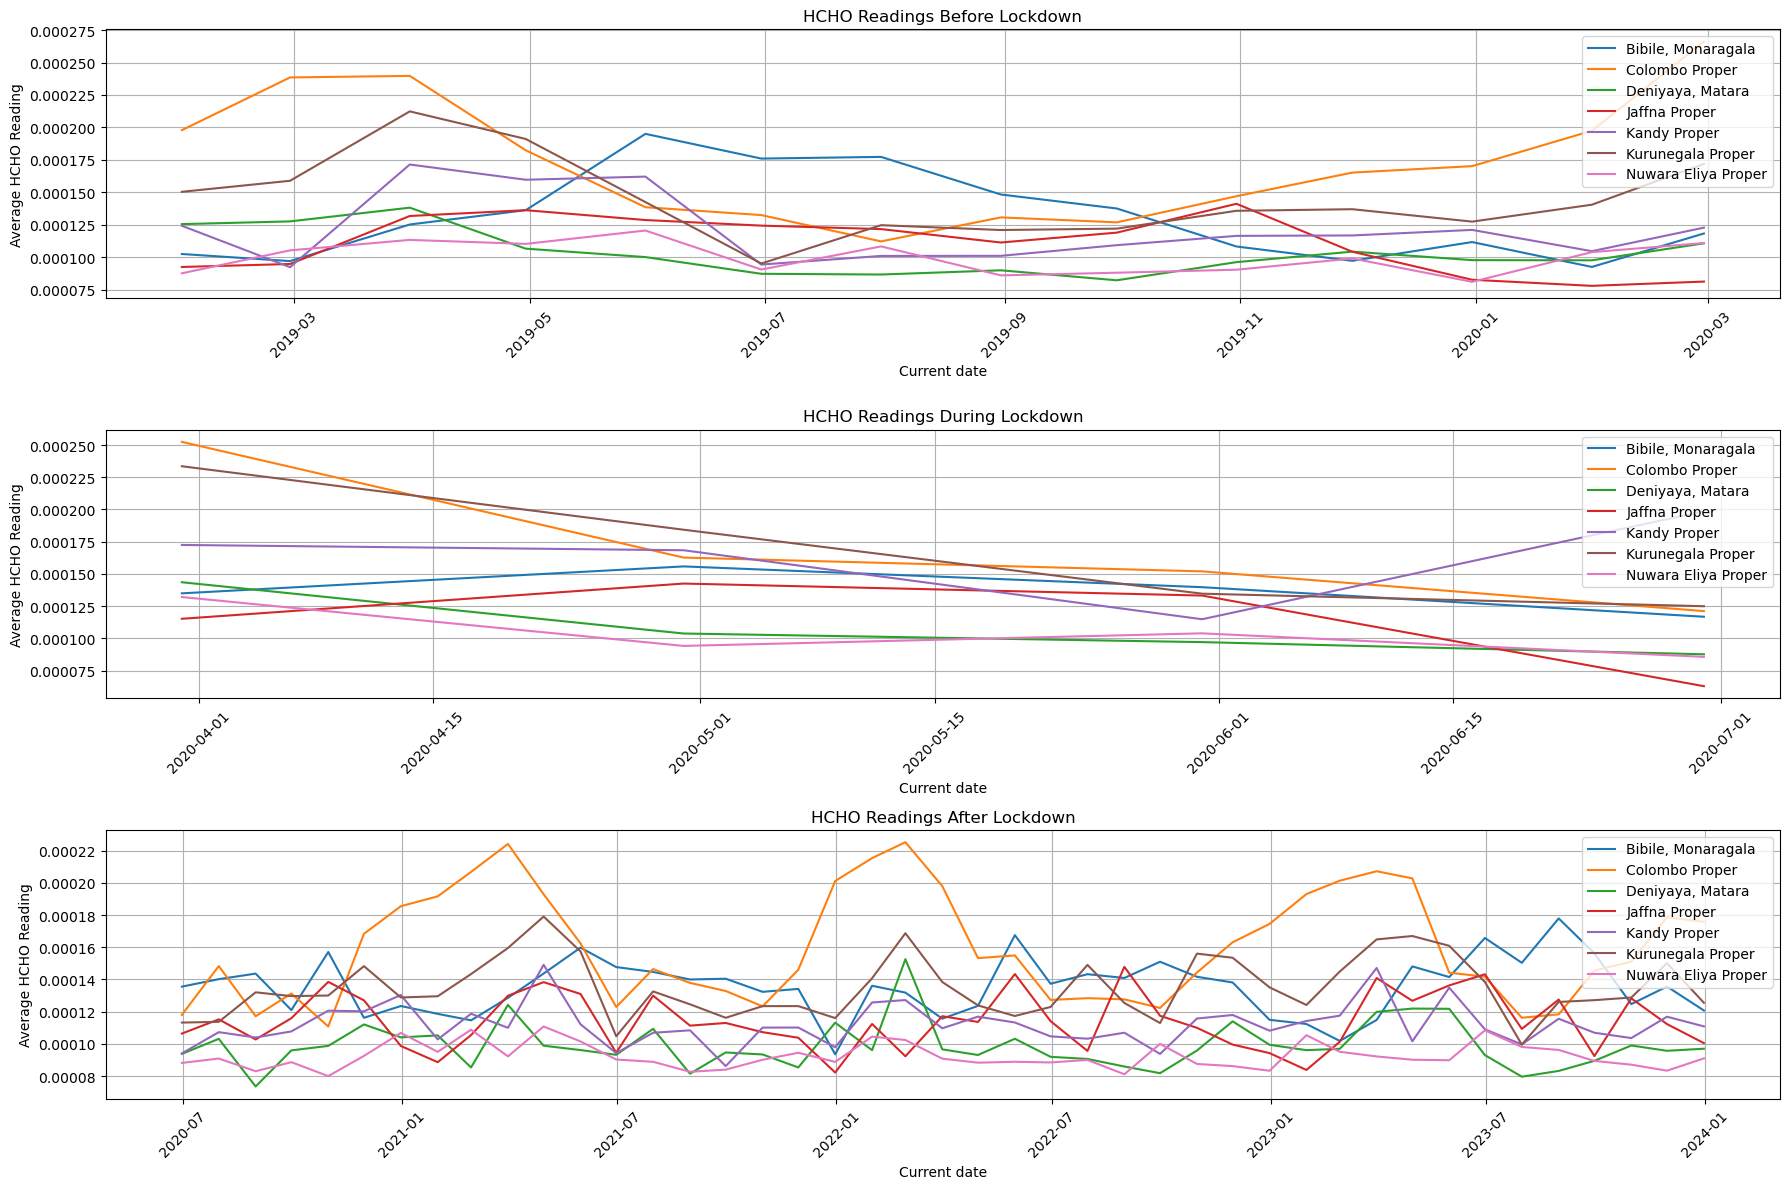

In [23]:
# Defining the lockdown period
lockdown_start =  pd.to_datetime('2020-03-01')
lockdown_end = pd.to_datetime('2020-06-01')

# Split data into three periods
before_lockdown = df[df['Current date'] < lockdown_start]
during_lockdown = df[(df['Current date'] >= lockdown_start) & (df['Current date'] <= lockdown_end)]
after_lockdown = df[df['Current date'] > lockdown_end]

# Aggregate HCHO readings for each periiod and location
before_lockdown_avg = before_lockdown.groupby(['Location', pd.Grouper(key='Current date', freq='M')])['HCHO readings'].mean().reset_index()
during_lockdown_avg = during_lockdown.groupby(['Location', pd.Grouper(key='Current date', freq='M')])['HCHO readings'].mean().reset_index()
after_lockdown_avg = after_lockdown.groupby(['Location', pd.Grouper(key='Current date', freq='M')])['HCHO readings'].mean().reset_index()

# Plot
plt.figure(figsize=(18, 12))

# Lines for HCHO readings before lockdown
plt.subplot(3, 1, 1)
for location in before_lockdown_avg['Location'].unique():
    location_data = before_lockdown_avg[before_lockdown_avg['Location'] == location]
    plt.plot(location_data['Current date'], location_data['HCHO readings'], label=location)
plt.title('HCHO Readings Before Lockdown')
plt.xlabel('Current date')
plt.ylabel('Average HCHO Reading')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)

# Lines for HCHO readings during lockdown
plt.subplot(3, 1, 2)
for location in during_lockdown_avg['Location'].unique():
    location_data = during_lockdown_avg[during_lockdown_avg['Location'] == location]
    plt.plot(location_data['Current date'], location_data['HCHO readings'], label=location)
plt.title('HCHO Readings During Lockdown')
plt.xlabel('Current date')
plt.ylabel('Average HCHO Reading')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)

# Lines for HCHO readings after lockdown
plt.subplot(3, 1, 3)
for location in after_lockdown_avg['Location'].unique():
    location_data = after_lockdown_avg[after_lockdown_avg['Location'] == location]
    plt.plot(location_data['Current date'], location_data['HCHO readings'], label=location)
plt.title('HCHO Readings After Lockdown')
plt.xlabel('Current date')
plt.ylabel('Average HCHO Reading')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

### Altitude VS HCHO readings by Location

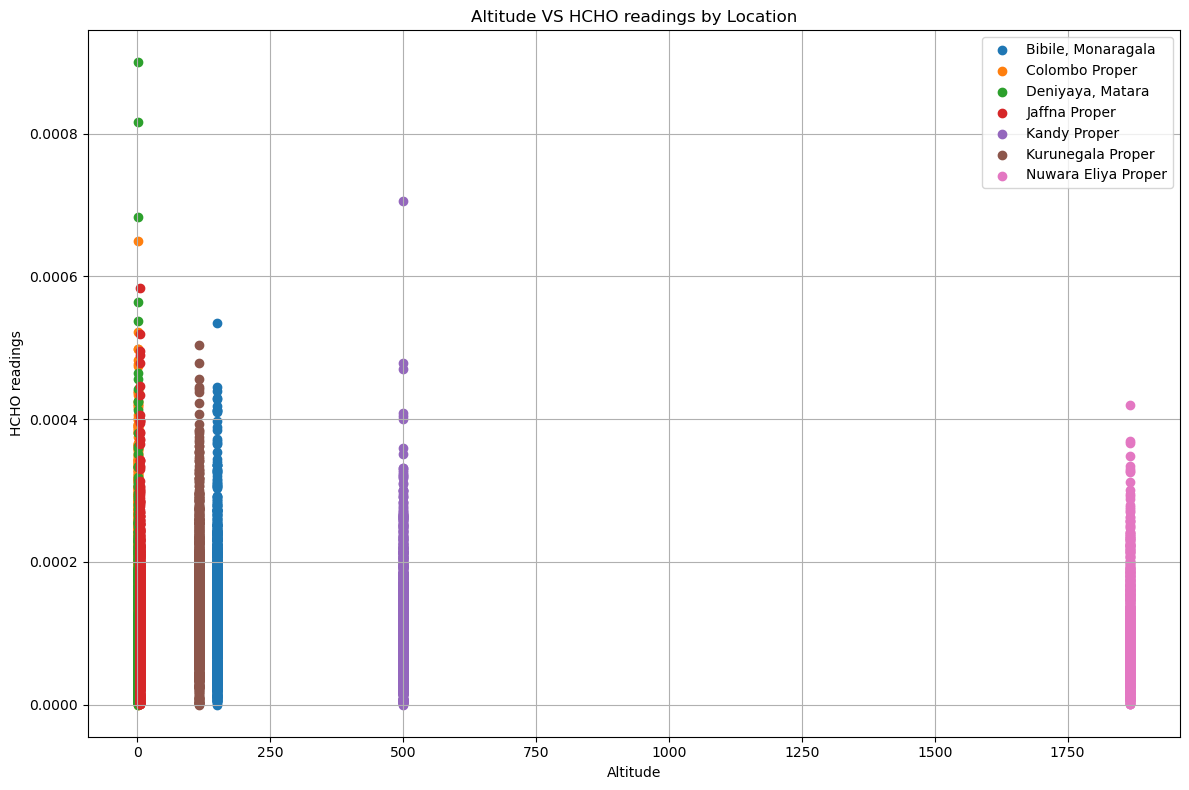

In [24]:
altitude_dict = {
    'Bibile, Monaragala' : 151,
    'Colombo Proper' : 1,
    'Deniyaya, Matara' : 2,
    'Jaffna Proper' : 5,
    'Kandy Proper' : 500,
    'Kurunegala Proper' : 116,
    'Nuwara Eliya Proper' : 1868
}

plt.figure(figsize = (12,8))

for location, altitude in altitude_dict.items():
    location_df = df[df['Location'] == location]
    
    altitudes = [altitude] * len(location_df)
    hcho_readings = location_df['HCHO readings'].tolist()
    
    plt.scatter(altitudes, hcho_readings, label = location)
    
plt.title('Altitude VS HCHO readings by Location')
plt.xlabel('Altitude')
plt.ylabel('HCHO readings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlate HCHO levels with external factors

In [25]:
weather_dataset = pd.read_csv('./External dataset/weather1.csv')
weather_dataset.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/2/2019,0.0,78,NaN,72.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/3/2019,0.0,81,87.0,71.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/4/2019,0.0,83,88.0,69.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/5/2019,0.0,84,90.0,65.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/6/2019,0.0,82,88.0,71.0


In [26]:
# Adding 1st row
add_data = {'STATION': 'CEM00043441', 'NAME': 'KURUNEGALA, CE', 'LATITUDE': 7.467, 'LONGITUDE': 80.367, 'ELEVATION': 116.0, 'DATE': '1/1/2019','PRCP': 0.00, 'TAVG': 82, 'TMAX': 88.0, 'TMIN' : 71.0} 
weather_dataset.loc[-1] = add_data
weather_dataset.index = weather_dataset.index + 1  # Shift the index by 1 to accommodate the new row
weather_dataset.sort_index(inplace=True) 
weather_dataset.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/1/2019,0.0,82,88.0,71.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/2/2019,0.0,78,NaN,72.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/3/2019,0.0,81,87.0,71.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/4/2019,0.0,83,88.0,69.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,1/5/2019,0.0,84,90.0,65.0


In [27]:
# Dropping unwanted columns
weather_dataset=weather_dataset.drop(columns=['STATION'])
weather_dataset.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,"KURUNEGALA, CE",7.467,80.367,116.0,1/1/2019,0.0,82,88.0,71.0
1,"KURUNEGALA, CE",7.467,80.367,116.0,1/2/2019,0.0,78,NaN,72.0
2,"KURUNEGALA, CE",7.467,80.367,116.0,1/3/2019,0.0,81,87.0,71.0
3,"KURUNEGALA, CE",7.467,80.367,116.0,1/4/2019,0.0,83,88.0,69.0
4,"KURUNEGALA, CE",7.467,80.367,116.0,1/5/2019,0.0,84,90.0,65.0


In [28]:
# Drop China Bay and Puttlam then change column names
dropped_cities = ['CHINA BAY, CE', 'PUTTALAM, CE']

weather_dataset = weather_dataset[~weather_dataset['NAME'].isin(dropped_cities)].reset_index(drop=True)
new_col_names = {'NAME': 'Location' , 'DATE': 'Current date', 'LATITUDE': 'latitude', 'LONGITUDE': 'longitude', 'ELEVATION': 'elevation' }

# Rename the columns
weather_dataset.rename(columns=new_col_names, inplace=True)
weather_dataset.head() 

,Location,latitude,longitude,elevation,Current date,PRCP,TAVG,TMAX,TMIN
0,"KURUNEGALA, CE",7.467,80.367,116.0,1/1/2019,0.0,82,88.0,71.0
1,"KURUNEGALA, CE",7.467,80.367,116.0,1/2/2019,0.0,78,NaN,72.0
2,"KURUNEGALA, CE",7.467,80.367,116.0,1/3/2019,0.0,81,87.0,71.0
3,"KURUNEGALA, CE",7.467,80.367,116.0,1/4/2019,0.0,83,88.0,69.0
4,"KURUNEGALA, CE",7.467,80.367,116.0,1/5/2019,0.0,84,90.0,65.0


In [29]:
# Convert to datetime
weather_dataset['Current date'] = pd.to_datetime(weather_dataset['Current date'])
weather_dataset.head()

,Location,latitude,longitude,elevation,Current date,PRCP,TAVG,TMAX,TMIN
0,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-01,0.0,82,88.0,71.0
1,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,78,NaN,72.0
2,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,81,87.0,71.0
3,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,83,88.0,69.0
4,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,84,90.0,65.0


In [30]:
# Checking for null values
weather_dataset.isnull().sum()

Location          0
latitude          0
longitude         0
elevation         0
Current date      0
PRCP             17
TAVG              0
TMAX            583
TMIN            926
dtype: int64

In [31]:
# Handling null values
prcp_mean = weather_dataset['PRCP'].mean()
weather_dataset['PRCP'].fillna(prcp_mean, inplace=True)

tmax_mean = weather_dataset['TMAX'].mean()
weather_dataset['TMAX'].fillna(tmax_mean, inplace=True)

tmin_mean = weather_dataset['TMIN'].mean()
weather_dataset['TMIN'].fillna(tmin_mean, inplace=True)
weather_dataset.isnull().sum()

Location        0
latitude        0
longitude       0
elevation       0
Current date    0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
dtype: int64

In [32]:
# Define new city names
new_city_names = {'KURUNEGALA, CE': 'Kurunegala Proper', 'NUWARA ELIYA, CE': 'Nuwara Eliya Proper', 'COLOMBO, CE': 'Colombo Proper' }

# Replace the old city names with the new city names 
weather_dataset['Location'] = weather_dataset['Location'].replace(new_city_names)

print(weather_dataset['Location'].unique())

['Kurunegala Proper' 'Colombo Proper' 'Nuwara Eliya Proper']


In [33]:
# Import 2nd weather dataset
weather_dataset2 = pd.read_csv('./External dataset/SriLanka_Weather_Dataset.csv' , na_values=["?"])
weather_dataset2.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [34]:
# Renaming columns
weather_dataset2.rename(columns={
    'city': 'Location',
    'time': 'Current date',
    'precipitation_sum': 'PRCP',
    'temperature_2m_mean': 'TAVG',
    'temperature_2m_max': 'TMAX',
    'temperature_2m_min': 'TMIN'}, inplace=True)
weather_dataset2.head()

,Current date,weathercode,TMAX,TMIN,TAVG,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,Location
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [35]:
# Dropping unwanted cities
weather_dataset2 = weather_dataset2[(weather_dataset2['Location'] != 'Colombo') & 
(weather_dataset2['Location'] != 'Mount Lavinia') &
(weather_dataset2['Location'] != 'Hambantota') &
(weather_dataset2['Location'] != 'Hatton') &
(weather_dataset2['Location'] != 'Mabole') &
(weather_dataset2['Location'] != 'Kurunegala') &
(weather_dataset2['Location'] != 'Pothuhera') &
(weather_dataset2['Location'] != 'Mannar') &
(weather_dataset2['Location'] != 'Matale') &
(weather_dataset2['Location'] != 'Bentota') &
(weather_dataset2['Location'] != 'Kalutara') &
(weather_dataset2['Location'] != 'Badulla') &
(weather_dataset2['Location'] != 'Puttalam') &
(weather_dataset2['Location'] != 'Gampaha') &
(weather_dataset2['Location'] != 'Kolonnawa') &
(weather_dataset2['Location'] != 'Weligama') &
(weather_dataset2['Location'] != 'Athurugiriya') &
(weather_dataset2['Location'] != 'Galle') &
(weather_dataset2['Location'] != 'Trincomalee') &
(weather_dataset2['Location'] != 'Kalmunai') &
(weather_dataset2['Location'] != 'Sri Jayewardenepura Kotte') &
(weather_dataset2['Location'] != 'Negombo') &
(weather_dataset2['Location'] != 'Ratnapura') &
(weather_dataset2['Location'] != 'Maharagama') &
(weather_dataset2['Location'] != 'Moratuwa') &
(weather_dataset2['Location'] != 'Kesbewa') &
(weather_dataset2['Location'] != 'Oruwala')].reset_index(drop=True)

In [36]:
date = weather_dataset2.groupby('Location')['Current date'].agg(['min', 'max'])
print(date)

                 min         max
Location                        
Jaffna    2010-01-01  2023-06-17
Kandy     2010-01-01  2023-06-17
Matara    2010-01-01  2023-06-17


In [37]:
weather_dataset2 = weather_dataset2[weather_dataset2['Current date'] >= '2019-01-01']
date = weather_dataset2.groupby('Location')['Current date'].agg(['min', 'max'])
weather_dataset2=weather_dataset2.reset_index(drop=True)
print(date)

                 min         max
Location                        
Jaffna    2019-01-01  2023-06-17
Kandy     2019-01-01  2023-06-17
Matara    2019-01-01  2023-06-17


In [38]:
# Drop unwanted columns
weather_dataset2 = weather_dataset2.drop(columns=['weathercode','apparent_temperature_max','apparent_temperature_min','apparent_temperature_mean','sunrise','sunset','shortwave_radiation_sum','rain_sum','snowfall_sum','precipitation_hours','windspeed_10m_max','windgusts_10m_max','winddirection_10m_dominant','et0_fao_evapotranspiration','country'])
weather_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Current date  4887 non-null   object 
 1   TMAX          4887 non-null   float64
 2   TMIN          4887 non-null   float64
 3   TAVG          4887 non-null   float64
 4   PRCP          4887 non-null   float64
 5   latitude      4887 non-null   float64
 6   longitude     4887 non-null   float64
 7   elevation     4887 non-null   float64
 8   Location      4887 non-null   object 
dtypes: float64(7), object(2)
memory usage: 343.7+ KB


In [39]:
# Change location names
weather_dataset2['Location'] = weather_dataset2['Location'].replace({'Jaffna': 'Jaffna Proper',
                                                           'Kandy': 'Kandy Proper',
                                                           'Matara': 'Deniyaya, Matara'})
weather_dataset2['Location'].value_counts()

Location
Kandy Proper        1629
Jaffna Proper       1629
Deniyaya, Matara    1629
Name: count, dtype: int64

In [40]:
weather_dataset2.head()

,Current date,TMAX,TMIN,TAVG,PRCP,latitude,longitude,elevation,Location
0,2019-01-01,24.6,19.5,21.8,0.0,7.300003,80.600006,510.0,Kandy Proper
1,2019-01-02,24.2,18.1,20.9,0.0,7.300003,80.600006,510.0,Kandy Proper
2,2019-01-03,25.7,17.7,21.2,0.0,7.300003,80.600006,510.0,Kandy Proper
3,2019-01-04,25.1,17.0,20.6,0.0,7.300003,80.600006,510.0,Kandy Proper
4,2019-01-05,25.6,17.7,21.8,0.0,7.300003,80.600006,510.0,Kandy Proper


In [41]:
# CHeck for null values
weather_dataset2.isnull().sum()

Current date    0
TMAX            0
TMIN            0
TAVG            0
PRCP            0
latitude        0
longitude       0
elevation       0
Location        0
dtype: int64

In [42]:
weather_data = pd.concat([weather_dataset,weather_dataset2]).reset_index(drop=True)
weather_data.head()

,Location,latitude,longitude,elevation,Current date,PRCP,TAVG,TMAX,TMIN
0,Kurunegala Proper,7.467,80.367,116.0,2019-01-01 00:00:00,0.0,82.0,88.000000,71.0
1,Kurunegala Proper,7.467,80.367,116.0,2019-01-02 00:00:00,0.0,78.0,82.260542,72.0
2,Kurunegala Proper,7.467,80.367,116.0,2019-01-03 00:00:00,0.0,81.0,87.000000,71.0
3,Kurunegala Proper,7.467,80.367,116.0,2019-01-04 00:00:00,0.0,83.0,88.000000,69.0
4,Kurunegala Proper,7.467,80.367,116.0,2019-01-05 00:00:00,0.0,84.0,90.000000,65.0


In [43]:
weather_data['Current date'] = pd.to_datetime(weather_data['Current date'])

In [44]:
cor_df = df[(df['Location'] != 'Bibile, Monaragala')].reset_index(drop=True)

In [45]:
weather_HCHO_df = pd.merge(cor_df, weather_data, on=['Location', 'Current date'], how='inner')
weather_HCHO_df.head()

,HCHO readings,Location,Current date,Next Date,Month,Year,latitude,longitude,elevation,PRCP,TAVG,TMAX,TMIN
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,January,2019,6.9,79.867,7.0,0.0,81.0,89.000000,74.0
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,January,2019,6.9,79.867,7.0,0.0,78.0,82.260542,74.0
2,0.000099,Colombo Proper,2019-01-03,2019-01-04,January,2019,6.9,79.867,7.0,0.0,81.0,90.000000,74.0
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,January,2019,6.9,79.867,7.0,0.0,81.0,91.000000,72.0
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,January,2019,6.9,79.867,7.0,0.0,81.0,90.000000,74.0


In [46]:
weather_HCHO_df.to_excel('final_HCHO_Weather_dataset.xlsx', index=False)

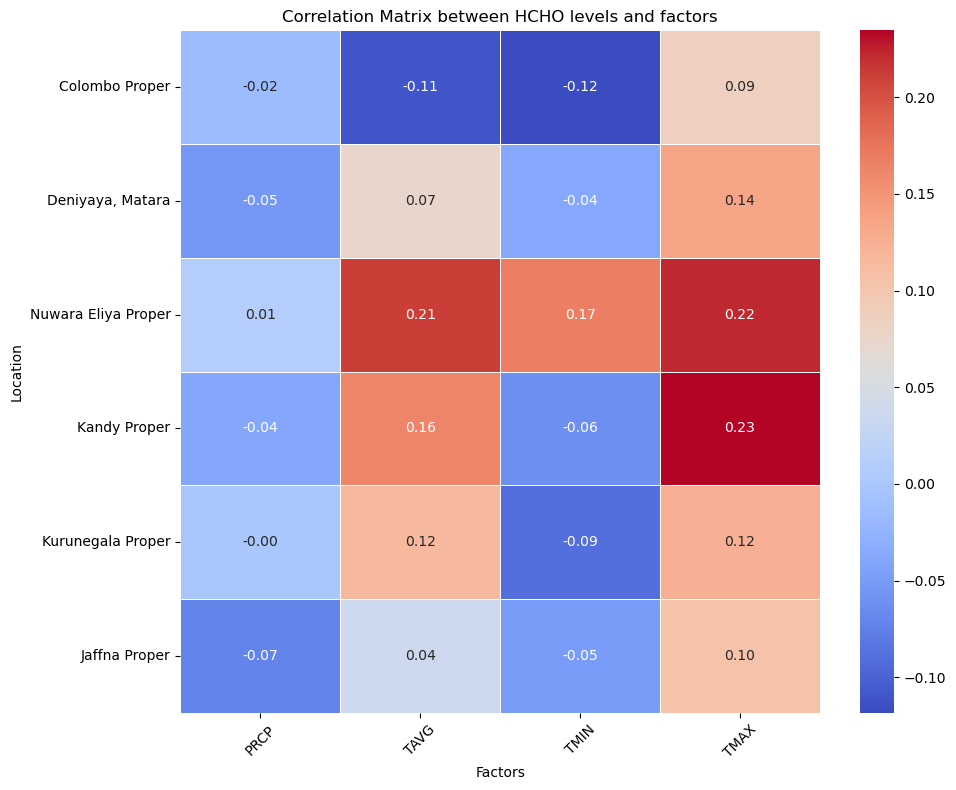

In [49]:
factors = ['PRCP', 'TAVG', 'TMIN', 'TMAX']
correlation_matrix = pd.DataFrame(columns=factors, index=weather_HCHO_df['Location'].unique())

# Calculate and store the correlations for each factor
for column in factors:
    correlation = weather_HCHO_df.groupby('Location')[['HCHO readings', column]].corr().unstack()['HCHO readings'][column]
    correlation_matrix[column] = correlation.values

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between HCHO levels and factors')
plt.xlabel('Factors')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

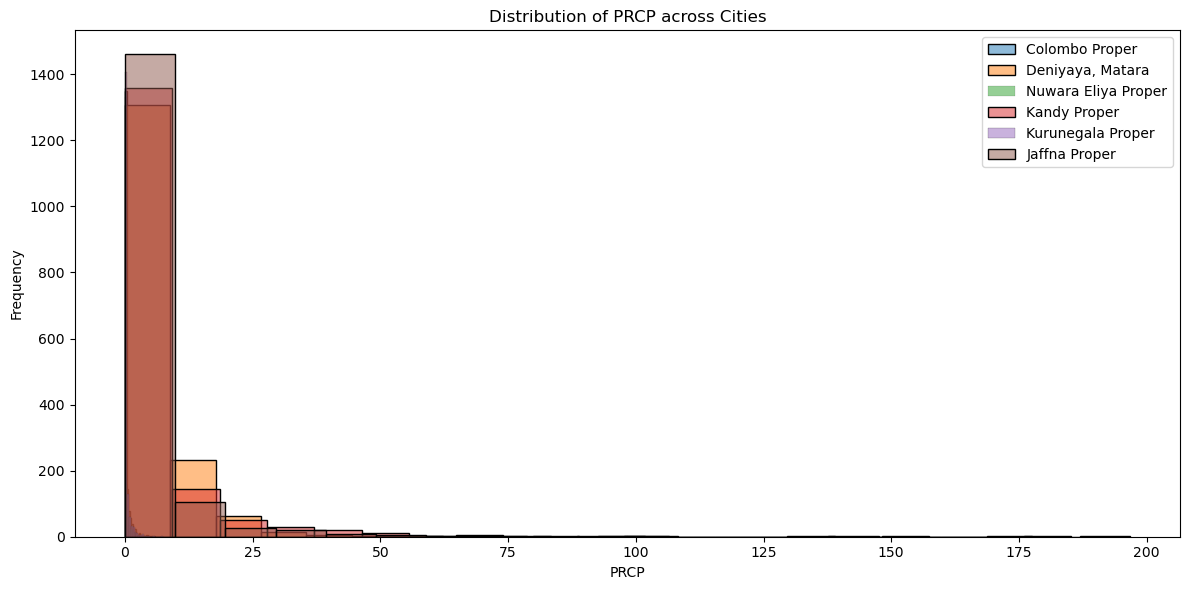

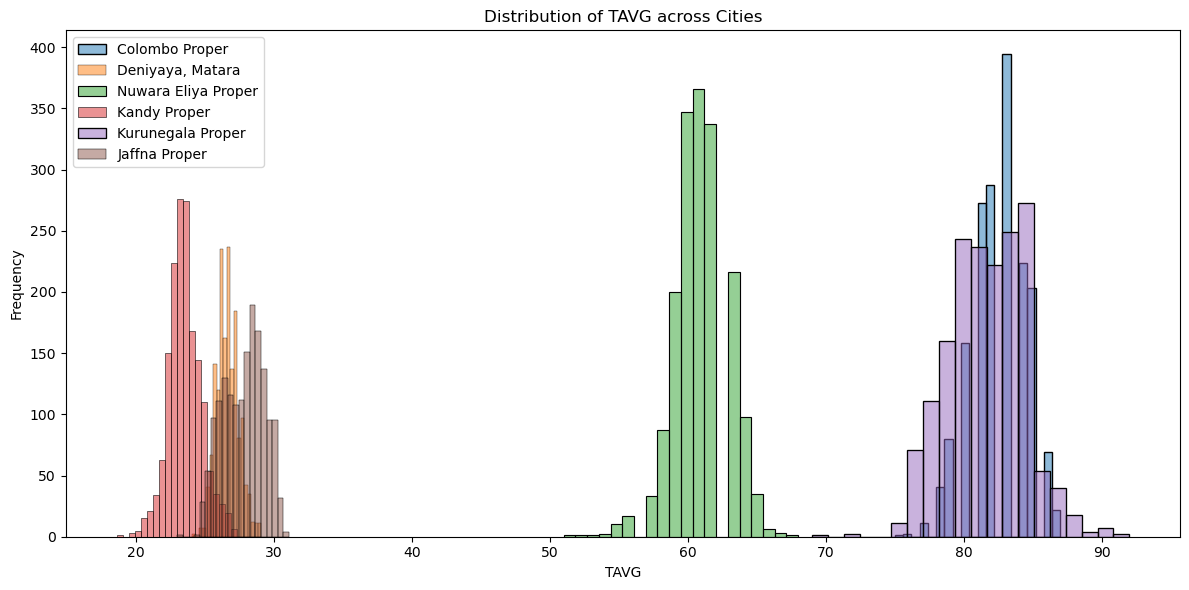

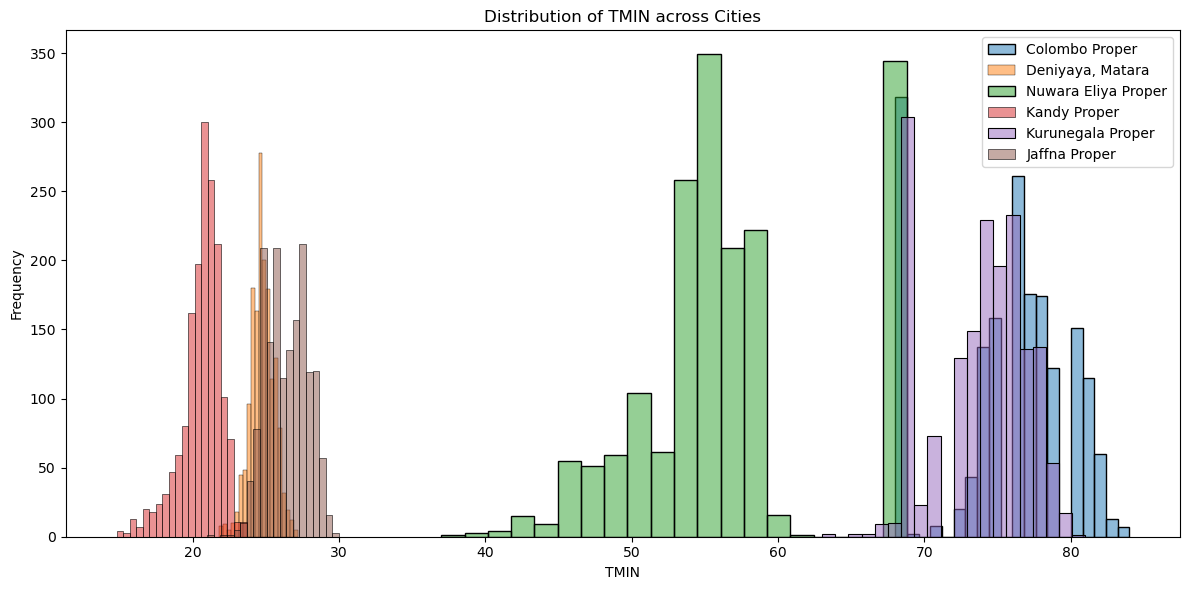

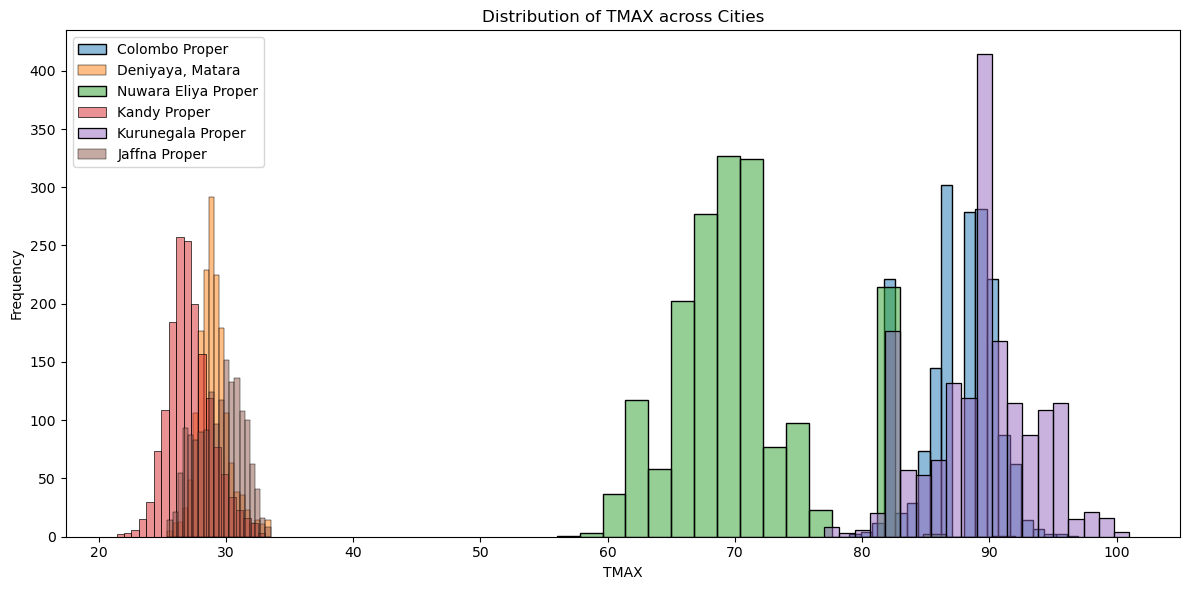

In [51]:
Cities = ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper', 'Kandy Proper', 'Kurunegala Proper', 'Jaffna Proper']
factors = ['PRCP', 'TAVG', 'TMIN', 'TMAX']

for factor in factors:
    plt.figure(figsize=(12, 6))
    for location in Cities:
        specific_location = weather_HCHO_df[weather_HCHO_df['Location'] == location]
        sns.histplot(data=specific_location[factor], bins=20, alpha=0.5, label=location)
    plt.title(f'Distribution of {factor} across Cities')
    plt.xlabel(factor)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()